In [89]:
author__ = "__fbbianco__"
''' CUSP 2016 UCSL
    Continuous probability diestributions demos
'''
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import pylab as pl
import pylab as pl
from IPython import display
import time
import json
import os

# this imports some of the pylab settings I like
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )

pl.rcParams.update(s)
pl.rcParams['font.size'] = 20

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


# Evolution of populations drawn under different distributions as the distribution parameters and sample size change

### Binomial B(100,p), change n

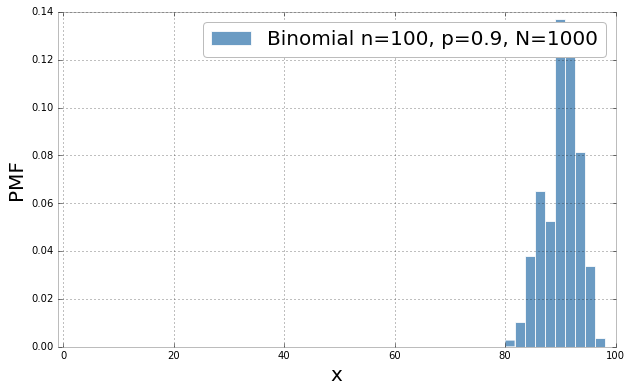

In [52]:

from IPython import display
np.random.seed(111)
n = 100
N = 1000
pl.figure(figsize=(10,6))
for p in [0.1,0.25,0.5,0.75,0.9]:
    pl.clf()
    pl.hist(np.random.binomial(n, p, N), alpha=0.8, 
            label="Binomial n=%d, p=%.1f, N=%d"%(n,p, N),
            color = 'SteelBlue', normed = True)
    pl.ylabel("PMF", fontsize = 20)
    pl.xlabel("x", fontsize = 20)
    pl.xlim(-1,100)
    #pl.ylim(0,0.8)
    pl.legend(fontsize = 20)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    


### Poisson distribution P(lambda), changing  lambda

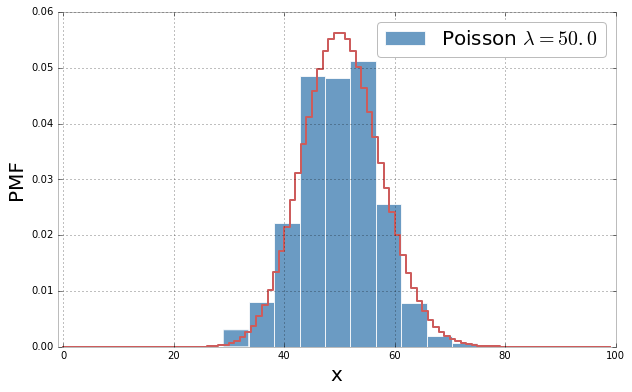

In [53]:


from scipy.stats import poisson

np.random.seed(111)
pl.figure(figsize=(10,6))

for lmbd in [1,5,10,25,50]:    
    pl.clf()
    pl.hist(np.random.poisson(lmbd, size=1000), alpha = 0.8, 
            label=r"Poisson $\lambda=%.1f$"%(lmbd), 
            color = 'SteelBlue', normed = True)
    pl.xlim(-1,100)
    #pl.ylim(0,0.8)
    pl.ylabel("PMF", fontsize=20)
    pl.xlabel("x", fontsize=20)
    pl.legend(fontsize=20)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
#overplot the theoretical distribution: the pmf
x = range(0,100) 
##the next line of code is complicated: I want the distribution to be plotted with steps
##this indicates that the distribution is NOT DEFINED for non integer values of x
pl.plot(np.array([[xx,xx] for xx in x]).flatten()[1:], 
        np.array([[poisson.pmf(xx, lmbd),poisson.pmf(xx, lmbd)] for xx in x]).flatten()[:-1], 
        '-', color='IndianRed')
display.display(pl.gcf())
display.clear_output(wait=True)    


### Gaussian distribution N(0,1), changing sample size

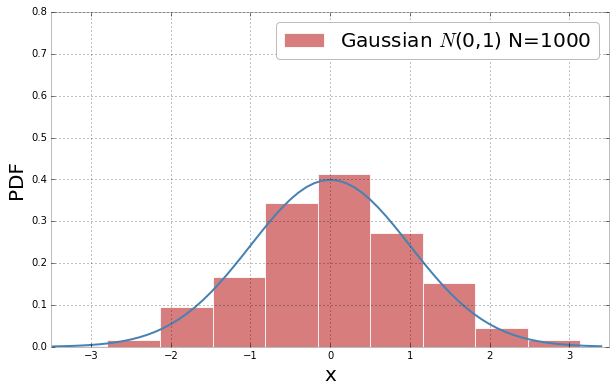

In [54]:
#it is very easy to write a gaussian distribution from scratch
def gaussian(x, mu, sig):
    norm = 1.0 / np.sqrt(2.0 * np.pi) / sig 
    return norm * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

np.random.seed(111)
pl.figure(figsize=(10,6))
for n in [10,50,100,500,1000]:
    
    pl.clf()
    pl.ylabel("PDF", fontsize=20)
    pl.xlabel("x", fontsize=20)
    pl.hist(np.random.randn(n), color = 'IndianRed', 
            normed = True, alpha=0.8,
            label=r"Gaussian $N$(0,1) N=%d"%(N))
    pl.xlim(-3.5,3.5)
    pl.ylim(0,0.8)
    pl.legend(fontsize = 20)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    
#overplot the theoretical distribution: the pmf
x = np.arange(-3.5,3.5,0.1) 
pl.plot(x, gaussian(x, 0, 1), color='SteelBlue')
display.display(pl.gcf())
display.clear_output(wait=True)

## Gaussian distribution N(mu, sigma), changing mu and sigma (sample size = 1000)


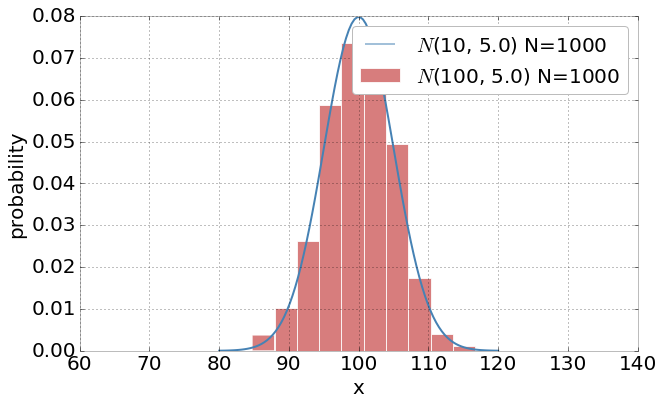

In [77]:
#it is very easy to write a gaussian distribution from scratch
def gaussian(x, mu, sig):
    norm = 1.0 / np.sqrt(2.0 * np.pi) / sig 
    return norm * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

muold, sigmaold = np.nan, np.nan
np.random.seed(111)
pl.figure(figsize=(10,6))
n = 1000
for mu,sigma in zip([0,1,5,5,5,10,100], [0.5,0.5,0.5,1,5,5,5]):
    pl.clf()
    if not np.isnan(muold):
        pl.plot(x, gaussian(x, muold, sigmaold), color='SteelBlue', 
            alpha = 0.5,
            label=r"$N$(%d, %.1f) N=%d"%(muold, sigmaold, N))
    pl.hist(np.random.normal(mu, sigma,n), color = 'IndianRed', 
            normed = True, alpha=0.8,
            label=r"$N$(%d, %.1f) N=%d"%(mu, sigma, N))
    #pl.xlim(.5,3.5)
    #pl.ylim(0,0.8)
    pl.xlim(mu-8*sigma, mu+8*sigma)
    pl.ylabel("PDF", fontsize=20)
    pl.xlabel("x", fontsize=20)
    pl.xticks(fontsize=20)
    pl.yticks(fontsize=20)
    pl.legend(fontsize = 20)
    time.sleep(1)

    #overplot the theoretical distribution: the pmf
    x = np.linspace(mu-4*sigma, mu+4*sigma, 100) 
    pl.plot(x, gaussian(x, mu, sigma), color='SteelBlue',
           label=r"$N$(%d, %.1f) N=%d"%(mu, sigma, N))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    muold, sigmaold  = mu, sigma

pl.ylabel("probability")

# Central Limit Theorem demonstration with binomial distribution

for ANY distribution, as the sample size
increases, 

the distribution of sample means
converges to the population mean

and the distribution of the means is Gaussian 

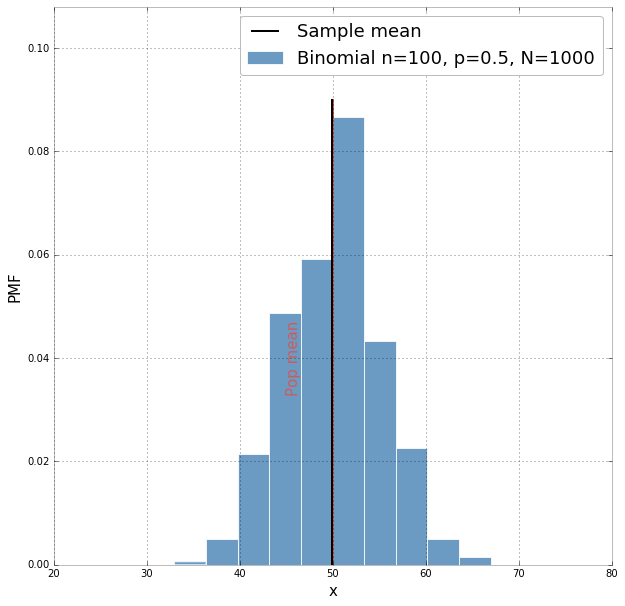

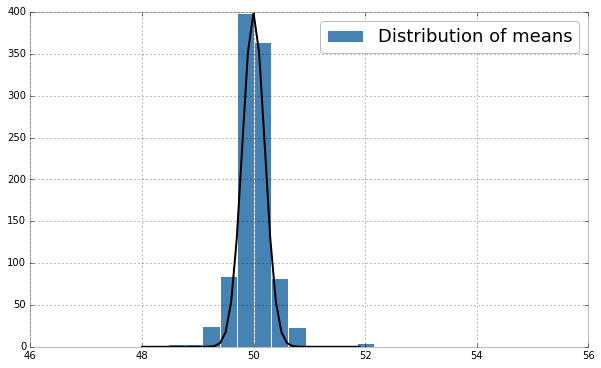

In [83]:
np.random.seed(111)
n = 100
p = 0.5
pl.figure(figsize=(10,10))
for N in [3,10,20,50,100,200,500,1000]:
    pl.clf()
    pl.plot()
    sample = np.random.binomial(n, p, N)
    
    pl.hist(sample, alpha=0.8, 
            label="Binomial n=%d, p=%.1f, N=%d"%(n, p, N),
            color = 'SteelBlue', normed = True)
    
    pl.xlim(20,80)
    #pl.ylim(0,0.8)
    pl.ylabel("PMF", fontsize=15)
    pl.xlabel("x", fontsize=15)
    pl.plot([100*0.5, 100*0.5], [0, pl.ylim()[1]], "IndianRed")
    pl.plot([sample.mean(), sample.mean()], [0, pl.ylim()[1]], "k",
           label = "Sample mean")
    pl.text(100*0.45, pl.ylim()[1]*0.5, "Pop mean", rotation=90,
           color="IndianRed", fontsize=15)
    pl.legend(fontsize = 18)
    pl.ylim(0, pl.ylim()[1]*1.2)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

    
binmeans = [np.random.binomial(n, p, N).mean() for N in np.arange(1,1000)]
pl.figure(figsize = (10,6))
patch = pl.hist(binmeans, bins=30, label = "Distribution of means")
pl.plot(np.arange(48, 52, 0.1), 
        gaussian(np.arange(48, 52, 0.1), n*p, 0.2)*200, 'k')
pl.legend(fontsize = 18)
    

# the Poisson Distribution approaches Gaussian for large $lambda$, with mean lamdba & stdev lambda (and so does the binomial!) 

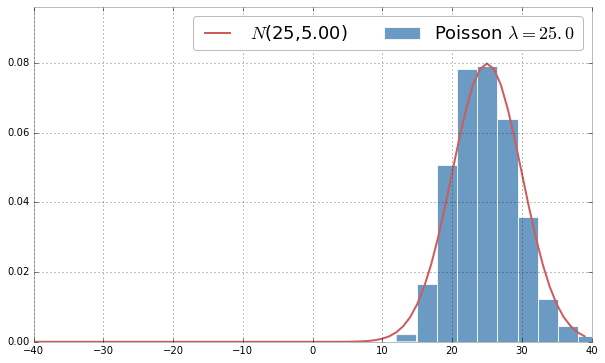

In [88]:
from scipy.stats import poisson

np.random.seed(111)
pl.figure(figsize = (10,6))
for lmbd in [1, 2, 3, 5, 10, 25]:
    
    pl.clf()
    pl.hist(np.random.poisson(lmbd, size=1000), alpha = 0.8, 
            label=r"Poisson $\lambda=%.1f$"%(lmbd), 
            color = 'SteelBlue', normed = True)
    pl.xlim(-40,40)
    pl.ylim(0, pl.ylim()[1]*1.2)
    
    time.sleep(1)
    
    #overplot the theoretical distribution: the pmf
    x = np.arange(-40,40,1) 
    pl.plot(x, gaussian(x, lmbd, np.sqrt(lmbd)), color='IndianRed', 
            label = r"$N$(%d,%.2f)"%(lmbd, np.sqrt(lmbd)))
    pl.legend(fontsize = 18, ncol=2)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
